<a href="https://colab.research.google.com/github/yessss28/Estadistica/blob/main/ProblemarioU5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemario de bloqueo

##Problema 1:
Se hace un estudio sobre la efectividad de tres marcas de atomizador para matar moscas. Para ello, cada producto se aplica a un grupo de 100 moscas, y se cuenta el número de moscas muertas expresado en porcentajes. Se hicieron seis réplicas, pero en días diferentes; por ello, se sospecha que puede haber algún efecto importante debido a esta fuente de variación. Los datos obtenidos se muestran a continuación:

| Marca de atomizador | Réplica 1 | Réplica 2 | Réplica 3 | Réplica 4 | Réplica 5 | Réplica 6 |
|----------------------|-----------|-----------|-----------|-----------|-----------|-----------|
| 1                   | 72        | 65        | 67        | 75        | 62        | 73        |
| 2                   | 55        | 59        | 68        | 70        | 53        | 50        |
| 3                   | 64        | 74        | 61        | 58        | 51        | 69        |

**Preguntas:**<br>
a) Suponiendo un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?  
c) ¿Hay algún atomizador mejor? Argumente su respuesta.  
d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.  
e) Verifique los supuestos de normalidad y de igual varianza entre las marcas.


In [109]:
import pandas as pd
from io import StringIO

data = '''
Marca,Replica,Valor
1,1,72
1,2,65
1,3,67
1,4,75
1,5,62
1,6,73
2,1,55
2,2,59
2,3,68
2,4,70
2,5,53
2,6,50
3,1,64
3,2,74
3,3,61
3,4,58
3,5,51
3,6,69
'''

df = pd.read_csv(StringIO(data))
df

#Yessenia Guadalupe Alvarez Morales

,Marca,Replica,Valor
0,1,1,72
1,1,2,65
2,1,3,67
3,1,4,75
4,1,5,62
5,1,6,73
6,2,1,55
7,2,2,59
8,2,3,68
9,2,4,70


# Diseño en bloques completamente al azar

In [110]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Replica'    # La variable que no me interesa comparar
interes = 'Marca'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
# print(tabla_anova) #

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
tabla_anova

#Yessenia Guadalupe Alvarez Morales

Resultados del ANOVA:

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


,sum_sq,df,F,PR(>F)
C(Marca),296.333333,2.0,2.880752,0.102804
C(Replica),281.333333,5.0,1.093973,0.420718
Residual,514.333333,10.0,NaN,NaN


El valor p para C(Marca) es 0.102804. Dado que este valor es mayor que el nivel de significancia común (por ejemplo, 0.05), no se encuentran diferencias estadísticamente significativas entre las "Marcas" (o niveles de este factor). Esto concuerda con la conclusión textual.

El valor p para C(Replica) es 0.420718. Al ser mayor que 0.05, no hay diferencias estadísticamente significativas atribuibles a las "Réplicas" (o bloques, como se menciona en la conclusión textual).

Representa la variabilidad no explicada por los factores en el modelo. Los valores 'NaN' (Not a Number) para F y PR(>F) en el residual son normales, ya que no es un factor a probar.

# GRAFICO DE INTERACCION

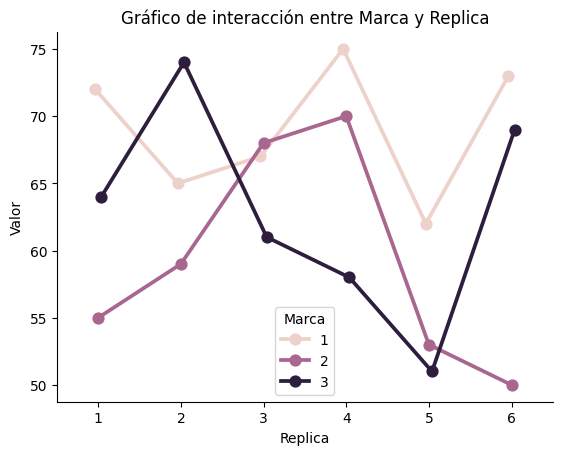

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

#Yessenia Guadalupe Alvarez Morales

El gráfico de interacción sugiere fuertemente que hay una interacción significativa entre "Marca" y "Réplica". Esto significa que el rendimiento o el "Valor" de una Marca no es constante a través de todas las Réplicas; en cambio, el rendimiento de una Marca particular depende de cuál Réplica se esté considerando.

a)

 Hipótesis para tratamientos (marcas):
 (todas las marcas tienen la misma efectividad)
 Al menos una  difiere.

Hipótesis para bloques (réplicas/días):
 (no hay efecto de los días)
 Al menos una  difiere.





b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?

Valor p para Marca (tratamiento): 0.1028
Como , no hay evidencia estadísticamente significativa para afirmar que hay diferencias entre las marcas de atomizadores.





c) ¿Hay algún atomizador mejor?

Aunque estadísticamente las diferencias no son significativas (p = 0.1028).

d)  Verifique los supuestos de normalidad y de igual varianza entre las marcas.

# Supuesto de Normalidad Test de Shapiro

In [112]:
# Prueba de Shapiro
from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Marca'] == 1]['Valor'], "Marca 1", nivel_de_significancia)
prueba_shapiro(df[df['Marca'] == 2]['Valor'], "Marca 2", nivel_de_significancia)
prueba_shapiro(df[df['Marca'] == 3]['Valor'], "Marca 3", nivel_de_significancia)


#Yessenia Guadalupe Alvarez Morales


Prueba de Shapiro-Wilk para Marca 1:
Estadístico: 0.9385
Valor p: 0.6471
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Marca 2:
Estadístico: 0.9066
Valor p: 0.4145
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Marca 3:
Estadístico: 0.9947
Valor p: 0.9975
Interpretación: Los datos tienen una distribución normal.


# Supuesto de homoscedasticidad: test de barlett

In [113]:

from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Marca'] == 1]['Valor'],
    df[df['Marca'] == 2]['Valor'],
    df[df['Marca'] == 3]['Valor'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

    #Yessenia Guadalupe Alvarez Morales

Estadístico de Bartlett: 2.563987653883703
Valor p: 0.2774834944728171
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


##Problema 2:
En una empresa lechera se tienen varios silos para almacenar leche (cisternas de 60 000 L). Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. Se sospecha que en algunos silos hay problemas, por ello, durante cinco días se decide registrar la temperatura a cierta hora crítica. Obviamente la temperatura de un día a otro es una fuente de variabilidad que podría impactar la variabilidad total.

| Silo | Lunes | Martes | Miércoles | Jueves | Viernes |
|------|-------|--------|-----------|--------|---------|
| A    | 4.0   | 4.0    | 5.0       | 0.5    | 3.0     |
| B    | 5.0   | 6.0    | 2.0       | 4.0    | 4.0     |
| C    | 4.5   | 4.0    | 3.5       | 2.0    | 3.0     |
| D    | 2.5   | 4.0    | 6.5       | 4.5    | 4.0     |
| E    | 4.0   | 4.0    | 3.5       | 2.0    | 4.0     |

**Preguntas:**<br>
a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?  
b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
c) ¿Hay diferencia entre los silos?  
d) ¿La temperatura de un día a otro es diferente?  
e) Revise residuos, ¿hay algún problema evidente?


In [114]:
import pandas as pd
from io import StringIO

data = '''
Silo,Día,Temperatura
A,Lunes,4.0
A,Martes,4.0
A,Miércoles,5.0
A,Jueves,0.5
A,Viernes,3.0
B,Lunes,5.0
B,Martes,6.0
B,Miércoles,2.0
B,Jueves,4.0
B,Viernes,4.0
C,Lunes,4.5
C,Martes,4.0
C,Miércoles,3.5
C,Jueves,2.0
C,Viernes,3.0
D,Lunes,2.5
D,Martes,4.0
D,Miércoles,6.5
D,Jueves,4.5
D,Viernes,4.0
E,Lunes,4.0
E,Martes,4.0
E,Miércoles,3.5
E,Jueves,2.0
E,Viernes,4.0
'''

df = pd.read_csv(StringIO(data))
df

#Yessenia Guadalupe Alvarez Morales

,Silo,Día,Temperatura
0,A,Lunes,4.0
1,A,Martes,4.0
2,A,Miércoles,5.0
3,A,Jueves,0.5
4,A,Viernes,3.0
5,B,Lunes,5.0
6,B,Martes,6.0
7,B,Miércoles,2.0
8,B,Jueves,4.0
9,B,Viernes,4.0


# Diseño en bloques completamente al azar

In [115]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Día'    # La variable que no me interesa comparar
interes = 'Silo'      # La variable que me interesa comparar
respuesta = 'Temperatura'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
# print(tabla_anova) #

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
tabla_anova

#Yessenia Guadalupe Alvarez Morales

Resultados del ANOVA:

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


,sum_sq,df,F,PR(>F)
C(Silo),4.46,4.0,0.690402,0.609212
C(Día),9.76,4.0,1.510836,0.246022
Residual,25.84,16.0,NaN,NaN


El ANOVA presentado indica que, con un nivel de significancia típico (por ejemplo, 0.05), no hay evidencia estadística suficiente para concluir que existen diferencias significativas en la variable de respuesta debido al factor "Silo" ni debido al factor "Día".

 La variabilidad observada en la variable de respuesta no puede atribuirse significativamente a los cambios entre los diferentes silos o entre los diferentes días.

# GRAFICO DE INTERACCION



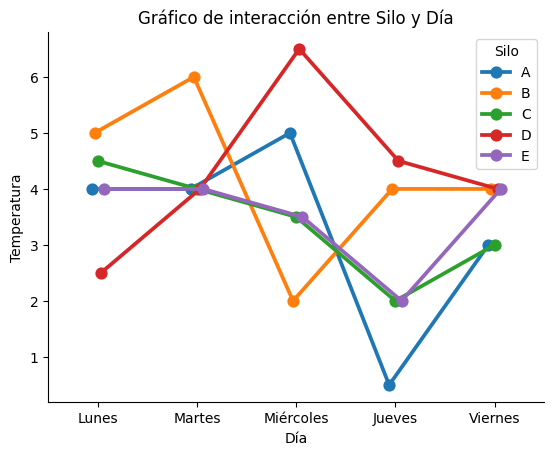

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

#Yessenia Guadalupe Alvarez Morales

Este gráfico indica una interacción significativa entre el "Silo" y el "Día". Esto significa que el efecto de un silo en la temperatura no es el mismo en todos los días. La temperatura de un silo particular depende del día en que se realizó la medición.

a) ¿Cuál es el factor de tratamiento y cuál es el factor de bloque?
 * Factor de Tratamiento: El factor que se está "probando" o cuyos diferentes niveles se quieren comparar es el Silo. Hay 5 niveles de silo (A, B, C, D, E).
 * Factor de Bloque: El factor que se utiliza para agrupar unidades experimentales homogéneas y reducir la variabilidad no explicada por el tratamiento es el Día. Se están observando los datos durante 5 días (Lunes, Martes, Miércoles, Jueves, Viernes), y es probable que la temperatura pueda variar de un día a otro independientemente del silo.

b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.
Un DBCA (Diseño de Bloques Completos al Azar) es apropiado cuando se tiene un factor de tratamiento y un factor de bloqueo.
 * Hipótesis Adecuadas:
   * Para el factor de Tratamiento (Silo):
     * H_0: Las temperaturas promedio de todos los silos son iguales. (\mu_A = \mu_B = \mu_C = \mu_D = \mu_E)
     * H_1: Al menos una de las temperaturas promedio de los silos es diferente. (No todas las \mu_i son iguales)
   * Para el factor de Bloque (Día):
     * H_0: Las temperaturas promedio son iguales en todos los días. (\tau_L = \tau_{Ma} = \tau_{Mi} = \tau_J = \tau_V)
     * H_1: Al menos una de las temperaturas promedio de los días es diferente. (No todas las \tau_j son iguales)
 * Modelo Estadístico:
   El modelo lineal aditivo para un DBCA es:
   Y_{ij} = \mu + \alpha_i + \tau_j + \epsilon_{ij}
   Donde:
   * Y_{ij}: Es la observación (temperatura) en el i-ésimo silo en el j-ésimo día.
   * \mu: Es la media general de la temperatura.
   * \alpha_i: Es el efecto del i-ésimo nivel del factor de tratamiento (Silo A, B, C, D, E).
   * \tau_j: Es el efecto del j-ésimo nivel del factor de bloque (Día Lunes, Martes, Miércoles, Jueves, Viernes).
   * \epsilon_{ij}: Es el error aleatorio asociado a la observación Y_{ij}, que se asume que sigue una distribución normal e independiente con media cero y varianza constante N(0, \sigma^2).
   Nota: Si se quisiera incluir la interacción (como sugieren los gráficos), el modelo sería Y_{ij} = \mu + \alpha_i + \tau_j + (\alpha\tau)_{ij} + \epsilon_{ij}, pero la pregunta específica pidió el modelo para un DBCA, que es aditivo.

c) ¿Hay diferencia entre los silos?
Basándonos en la tabla ANOVA que proporcionaste (donde aparece "C(Silo)"):
 * Factor: C(Silo)
 * Valor p [PR(>F)]: 0.609212
Dado que el valor p (0.609212) es mayor que el nivel de significancia común (por ejemplo, 0.05 o 0.10), no hay evidencia estadística suficiente para concluir que existen diferencias significativas en la temperatura promedio entre los diferentes silos.

d) ¿La temperatura de un día a otro es diferente?
Basándonos en la tabla ANOVA que proporcionaste (donde aparece "C(Día)"):
 * Factor: C(Día)
 * Valor p [PR(>F)]: 0.246022
Dado que el valor p (0.246022) es mayor que el nivel de significancia común (por ejemplo, 0.05 o 0.10), no hay evidencia estadística suficiente para concluir que existen diferencias significativas en la temperatura promedio de un día a otro.


# e) Revise residuos, ¿hay algún problema evidente?

In [117]:
#Yessenia Guadalupe Alvarez Morales
# Prueba de Shapiro
from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Silo'] == "A"]['Temperatura'], "Silo A", nivel_de_significancia)
prueba_shapiro(df[df['Silo'] == "B"]['Temperatura'], "Silo B", nivel_de_significancia)
prueba_shapiro(df[df['Silo'] == "C"]['Temperatura'], "Silo C", nivel_de_significancia)
prueba_shapiro(df[df['Silo'] == "D"]['Temperatura'], "Silo D", nivel_de_significancia)
prueba_shapiro(df[df['Silo'] == "E"]['Temperatura'], "Silo E", nivel_de_significancia)


Prueba de Shapiro-Wilk para Silo A:
Estadístico: 0.8854
Valor p: 0.3344
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo B:
Estadístico: 0.9556
Valor p: 0.7773
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo C:
Estadístico: 0.9787
Valor p: 0.9276
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo D:
Estadístico: 0.9306
Valor p: 0.6006
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo E:
Estadístico: 0.7008
Valor p: 0.0098
Interpretación: Los datos no tienen una distribución normal.


In [118]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Silo'] == "A"]['Temperatura'],
    df[df['Silo'] == "B"]['Temperatura'],
    df[df['Silo'] == "C"]['Temperatura'],
    df[df['Silo'] == "D"]['Temperatura'],
    df[df['Silo'] == "E"]['Temperatura'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

    #Yessenia Guadalupe Alvarez Morales

Estadístico de Bartlett: 2.3581336401556414
Valor p: 0.6702060348913189
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


## Problema 3
Se diseñó un experimento para estudiar el rendimiento de cuatro detergentes. Las siguientes lecturas de “blancura” se obtuvieron con un equipo especial diseñado para 12 cargas de lavado, distribuidas en tres modelos de lavadoras:

| Detergente | Lavadora 1 | Lavadora 2 | Lavadora 3 |
|------------|------------|------------|------------|
| A          | 45         | 43         | 51         |
| B          | 47         | 44         | 52         |
| C          | 50         | 49         | 57         |
| D          | 42         | 37         | 49         |

**Preguntas:**<br>
a) Señale el nombre del diseño experimental utilizado.  
b) Formule la hipótesis que se quiere probar en este problema.  
c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones.  



In [119]:
import pandas as pd
from io import StringIO

data = '''
Detergente,Lavadora,Lectura
A,1,45
A,2,43
A,3,51
B,1,47
B,2,44
B,3,52
C,1,50
C,2,49
C,3,57
D,1,42
D,2,37
D,3,49

'''

df = pd.read_csv(StringIO(data))
df

#Yessenia Guadalupe Alvarez Morales

,Detergente,Lavadora,Lectura
0,A,1,45
1,A,2,43
2,A,3,51
3,B,1,47
4,B,2,44
5,B,3,52
6,C,1,50
7,C,2,49
8,C,3,57
9,D,1,42


# Diseño en bloques completamente al azar

In [120]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Lavadora'    # La variable que no me interesa comparar
interes = 'Detergente'      # La variable que me interesa comparar
respuesta = 'Lectura'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
# print(tabla_anova) #

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
tabla_anova

#Yessenia Guadalupe Alvarez Morales

Resultados del ANOVA:

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


,sum_sq,df,F,PR(>F)
C(Detergente),133.666667,3.0,34.127660,0.000363
C(Lavadora),170.166667,2.0,65.170213,0.000085
Residual,7.833333,6.0,NaN,NaN


Dado que ambos valores p (0.000363 y 0.000085) son menores que el nivel de significancia común (ej., 0.05), se concluye que sí hay diferencias estadísticamente significativas en los resultados entre los diferentes tipos de "Detergente" Y también entre los diferentes tipos de "Lavadora".

# GRAFICO DE INTERACCION

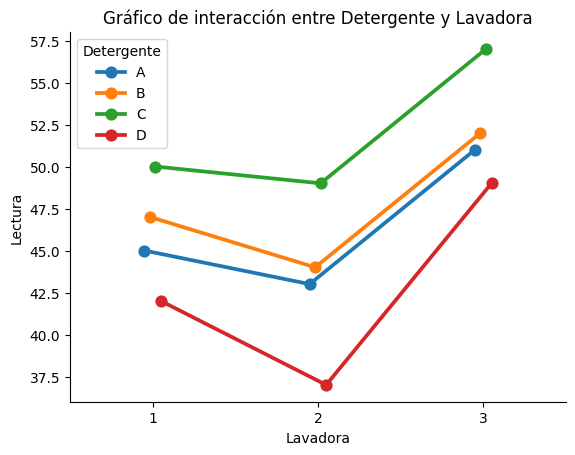

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

#Yessenia Guadalupe Alvarez Morales

El gráfico de interacción confirma y refuerza la idea de que hay una interacción significativa. Esto significa que el "mejor" detergente (el que da la "Lectura" más alta o deseada) no es el mismo para todas las lavadoras, y el rendimiento de un detergente específico varía considerablemente dependiendo de la lavadora con la que se combine.

# Tukey

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   1.3333 0.9847 -11.0002 13.6669  False
     A      C   5.6667  0.495  -6.6669 18.0002  False
     A      D  -3.6667  0.779 -16.0002  8.6669  False
     B      C   4.3333 0.6855  -8.0002 16.6669  False
     B      D     -5.0 0.5887 -17.3336  7.3336  False
     C      D  -9.3333 0.1495 -21.6669  3.0002  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

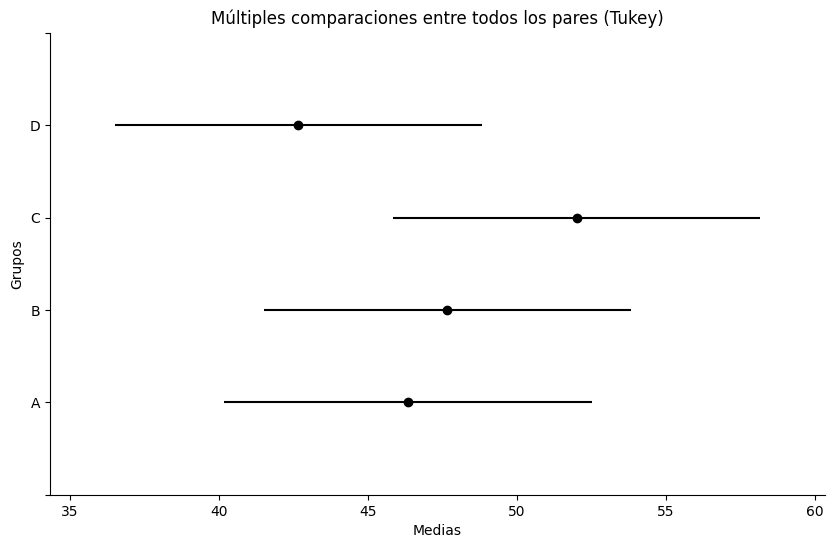

In [122]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Lectura'], groups=df['Detergente'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Yessenia Guadalupe Alvarez Morales

# b) Formule la hipótesis que se quiere probar en este problema.

# Supuesto de normalidad Test de Shapiro

In [123]:
# Prueba de Shapiro
from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Detergente'] == "A"]['Lectura'], "Detergente A", nivel_de_significancia)
prueba_shapiro(df[df['Detergente'] == "B"]['Lectura'], "Detergente B", nivel_de_significancia)
prueba_shapiro(df[df['Detergente'] == "C"]['Lectura'], "Detergente C", nivel_de_significancia)
prueba_shapiro(df[df['Detergente'] == "D"]['Lectura'], "Detergente D", nivel_de_significancia)


#Yessenia Guadalupe Alvarez Morales


Prueba de Shapiro-Wilk para Detergente A:
Estadístico: 0.9231
Valor p: 0.4633
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Detergente B:
Estadístico: 0.9796
Valor p: 0.7262
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Detergente C:
Estadístico: 0.8421
Valor p: 0.2196
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Detergente D:
Estadístico: 0.9908
Valor p: 0.8168
Interpretación: Los datos tienen una distribución normal.


# Supuesto de homoscedasticidad Test de Barlett

In [124]:

from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Detergente'] == "A"]['Lectura'],
    df[df['Detergente'] == "B"]['Lectura'],
    df[df['Detergente'] == "C"]['Lectura'],
    df[df['Detergente'] == "D"]['Lectura'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

    #Yessenia Guadalupe Alvarez Morales

Estadístico de Bartlett: 2.766766945554789
Valor p: 0.4289999281632636
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


## Problema 4
Con respecto al problema anterior:<br>
a) Conteste los tres incisos del problema anterior sin tomar en cuenta el efecto de las lavadoras y obtenga conclusiones.  
b) ¿Hay diferencias en las conclusiones anteriores y las del problema anterior? Explique su respuesta.  
c) ¿Con cuáles conclusiones se queda? Explique su respuesta.

# ANOVA DE UNA SOLA VIA

In [125]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols('Lectura~ C(Detergente)',data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#No se rechaza la hipotesis nula
#Yessenia Guadalupe Alvarez Morales

,df,sum_sq,mean_sq,F,PR(>F)
C(Detergente),3.0,133.666667,44.555556,2.002497,0.19229
Residual,8.0,178.000000,22.250000,NaN,NaN


## Problema 5
Una de las variables críticas en el proceso de ensamble del brazo lector de un disco duro es el ángulo que este forma con el cuerpo principal de la cabeza lectora. Se corre un experimento con el objetivo de comparar dos equipos que miden dicho ángulo en unidades de radianes. Se decide utilizar como factor de bloque a los operadores de los equipos. Los resultados se muestran en la siguiente tabla:

| Operador | Equipo 1                                         | Equipo 2                                         |
|----------|--------------------------------------------------|--------------------------------------------------|
| 1        | 1.328, 0.985, 1.316, 1.553, 1.310               | 1.273, 0.985, 1.134, 1.412, 0.917               |
|          | 1.113, 1.057, 1.144, 1.485, 1.386               | 0.789, 0.671, 0.554, 1.386, 1.289               |
| 2        | 1.269, 1.268, 1.091, 1.195, 1.380               | 1.036, 0.783, 1.108, 1.129, 1.132               |
|          | 1.093, 0.984, 1.087, 1.482, 1.442               | 0.201, 0.900, 0.916, 1.434, 1.223               |
| 3        | 1.440, 1.079, 1.389, 1.611, 1.445               | 1.454, 1.063, 1.219, 1.602, 1.583               |
|          | 1.150, 1.190, 1.247, 1.617, 1.574               | 1.018, 1.050, 0.997, 1.538, 1.478               |

### Preguntas y ejercicios:
a) Plantee el modelo y las hipótesis más adecuadas al problema.  
b) ¿Existen diferencias entre los equipos? Argumente estadísticamente.  
c) ¿Existen diferencias entre los operadores?  
d) Dibuje los diagramas de cajas simultáneos y las gráficas de medias para ambos factores, después interprételas.  
e) Verifique los supuestos de normalidad e igualdad de varianza entre tratamientos, así como la posible presencia de puntos aberrantes.


In [126]:
import pandas as pd
from io import StringIO

data = '''

Equipo,Operador,Angulo
1,1,1.328
1,1,0.985
1,1,1.316
1,1,1.553
1,1,1.310
1,1,1.113
1,1,1.057
1,1,1.144
1,1,1.485
1,1,1.386
1,2,1.269
1,2,1.268
1,2,1.091
1,2,1.195
1,2,1.380
1,2,1.036
1,2,0.783
1,2,1.108
1,2,1.129
1,2,1.132
1,3,1.440
1,3,1.079
1,3,1.389
1,3,1.611
1,3,1.445
1,3,1.150
1,3,1.190
1,3,1.247
1,3,1.617
1,3,1.574
2,1,1.273
2,1,0.985
2,1,1.134
2,1,1.412
2,1,0.917
2,1,0.789
2,1,0.671
2,1,0.554
2,1,1.386
2,1,1.289
2,2,1.036
2,2,0.783
2,2,1.108
2,2,1.129
2,2,1.132
2,2,0.201
2,2,0.900
2,2,0.916
2,2,1.434
2,2,1.223
2,3,1.454
2,3,1.063
2,3,1.219
2,3,1.602
2,3,1.583
2,3,1.018
2,3,1.050
2,3,0.997
2,3,1.538
2,3,1.478
'''


df = pd.read_csv(StringIO(data))
df

#Yessenia Guadalupe Alvarez Morales

,Equipo,Operador,Angulo
0,1,1,1.328
1,1,1,0.985
2,1,1,1.316
3,1,1,1.553
4,1,1,1.310
5,1,1,1.113
6,1,1,1.057
7,1,1,1.144
8,1,1,1.485
9,1,1,1.386


# Diseño en bloques completamente al azar

In [127]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Operador'    # La variable que no me interesa comparar
interes = 'Equipo'      # La variable que me interesa comparar
respuesta = 'Angulo'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
# print(tabla_anova) #

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
tabla_anova

#Yessenia Guadalupe Alvarez Morales

Resultados del ANOVA:

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


,sum_sq,df,F,PR(>F)
C(Equipo),0.342922,1.0,5.711701,0.020242
C(Operador),0.781471,2.0,6.508092,0.002875
Residual,3.362153,56.0,NaN,NaN


# GRAFICO DE INTERACCION

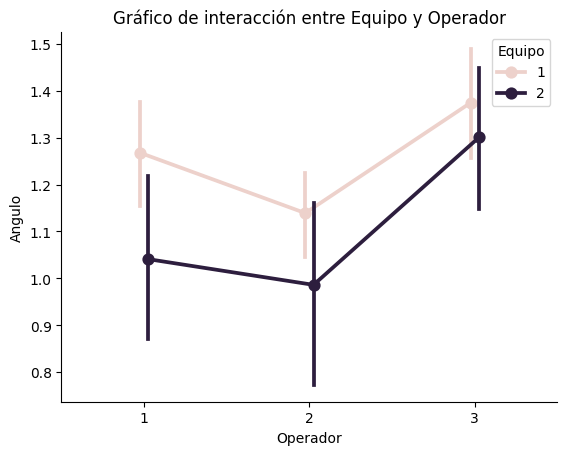

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

#Yessenia Guadalupe Alvarez Morales

# d) Dibuje los diagramas de cajas simultáneos y las gráficas de medias para ambos factores, después interprételas.

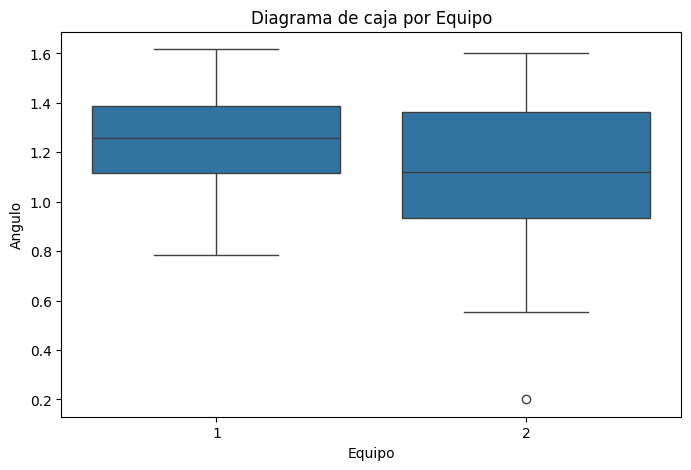

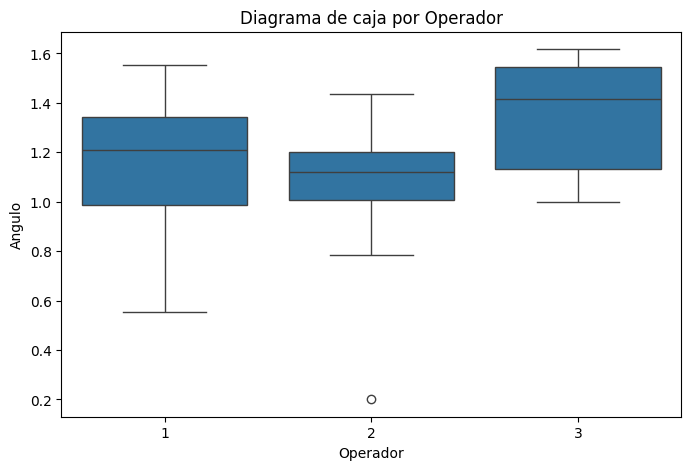

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diagrama de caja por equipo
plt.figure(figsize=(8,5))
sns.boxplot(x='Equipo', y='Angulo', data=df)
plt.title('Diagrama de caja por Equipo')
plt.show()

# Diagrama de caja por operador
plt.figure(figsize=(8,5))
sns.boxplot(x='Operador', y='Angulo', data=df)
plt.title('Diagrama de caja por Operador')
plt.show()

#Yessenia Guadalupe Alvarez Morales


# Gráfica de medias por equipo

<ipython-input-130-31201d658d5f>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Equipo', y='Angulo', data=df, capsize=0.1, ci='sd', join=False)
<ipython-input-130-31201d658d5f>:5: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='Equipo', y='Angulo', data=df, capsize=0.1, ci='sd', join=False)


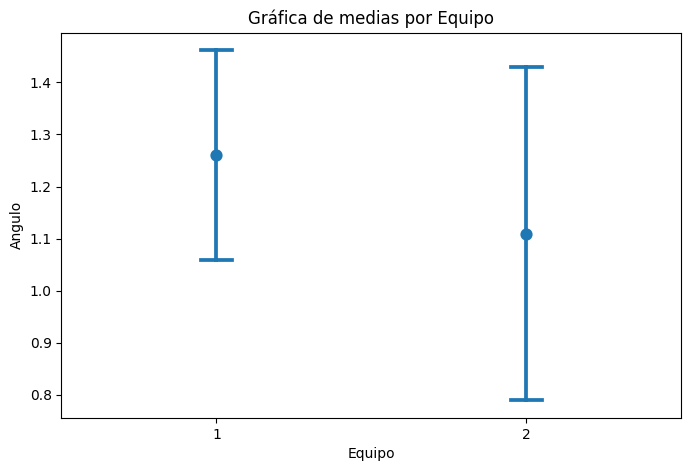

<ipython-input-130-31201d658d5f>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Operador', y='Angulo', data=df, capsize=0.1, ci="sd", join=False)
<ipython-input-130-31201d658d5f>:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='Operador', y='Angulo', data=df, capsize=0.1, ci="sd", join=False)


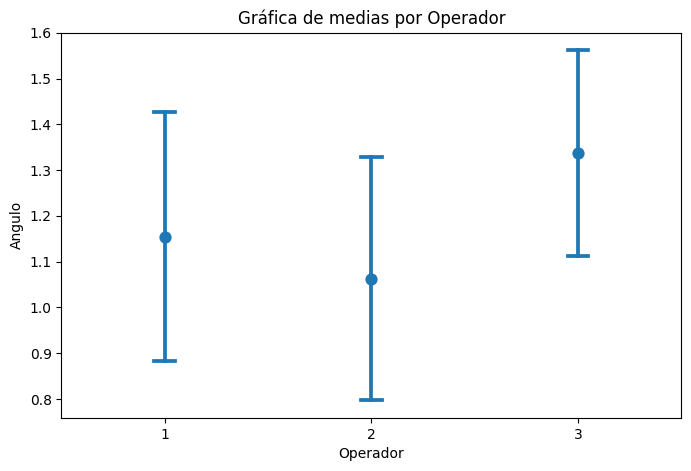

In [130]:
# Gráfica de medias por equipo
plt.figure(figsize=(8,5))
sns.pointplot(x='Equipo', y='Angulo', data=df, capsize=0.1, ci='sd', join=False)
plt.title('Gráfica de medias por Equipo')
plt.show()

# Gráfica de medias por operador
plt.figure(figsize=(8,5))
sns.pointplot(x='Operador', y='Angulo', data=df, capsize=0.1, ci="sd", join=False)
plt.title('Gráfica de medias por Operador')
plt.show()

#Yessenia Guadalupe Alvarez Morales


# e) Verifique los supuestos de normalidad e igualdad de varianza entre tratamientos, así como la posible presencia de puntos aberrantes.

In [131]:
#Yessenia Guadalupe Alvarez Morales
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Equipo'] == 1]['Angulo'], "Equipo 1", nivel_de_significancia)
prueba_shapiro(df[df['Equipo'] == 2]['Angulo'], "Equipo 2", nivel_de_significancia)


Prueba de Shapiro-Wilk para Equipo 1:
Estadístico: 0.9726
Valor p: 0.6111
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Equipo 2:
Estadístico: 0.9602
Valor p: 0.3129
Interpretación: Los datos tienen una distribución normal.


In [132]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Equipo'] == 1]['Angulo'],
    df[df['Equipo'] == 2]['Angulo'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

#Yessenia Guadalupe Alvarez Morales

Estadístico de Bartlett: 5.861857628615241
Valor p: 0.015472455921016526
Rechazamos la hipótesis nula: Las varianzas no son iguales.


## Problema 6
Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. De manera tradicional se han usado termómetros de mercurio (Mer) para verificar que la temperatura sea la adecuada, pero ahora se han comprado termómetros electrónicos (Rtd) para facilitar el proceso de medición. Sin embargo, se duda de las mediciones de estos nuevos dispositivos. Para aclarar dudas y diagnosticar la situación, durante cinco días se toman mediciones con ambos tipos de termómetros en varios silos (a la misma hora). Los datos para cinco silos se muestran a continuación:

| Silo | Día 1 (Mer) | Día 1 (Rtd) | Día 2 (Mer) | Día 2 (Rtd) | Día 3 (Mer) | Día 3 (Rtd) | Día 4 (Mer) | Día 4 (Rtd) | Día 5 (Mer) | Día 5 (Rtd) |
|------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|--|
| A    | 4.0         | 2.6         | 4.0         | 2.8         | 5.0         | 5.0         | 0.5         | 0.0         | 3.0         | 2.4         |
| B    | 5.0         | 6.4         | 6.0         | 6.4         | 2.0         | 2.3         | 4.0         | 4.2         | 4.0         | 4.0         |
| C    | 4.5         | 3.3         | 4.0         | 1.4         | 3.5         | 1.8         | 2.0         | -1.9        | 3.0         | -7.6        |
| D    | 2.5         | 3.1         | 4.0         | 5.0         | 6.5         | 6.6         | 4.5         | 2.7         | 4.0         | 4.0         |
| E    | 4.0         | 0.0         | 4.0         | 3.5         | 0.6         | 2.0         | -4.0        | -4.0        | -4.0        | -6.3        |

**Preguntas:**<br>
a) Observe los datos y establezca una conjetura acerca de la confiabilidad de las mediciones con Rtd (del termómetro de mercurio no hay duda).  
b) Es claro que el silo se puede ver como tratamiento y día como bloque. Considere sólo los datos de Rtd y establezca el modelo estadístico. También haga el ANOVA correspondiente y obtenga conclusiones.  
c) Repita el inciso anterior pero ahora para las mediciones Mer.  
d) ¿Las conclusiones obtenidas en los incisos anteriores coinciden? Comente su respuesta.  
e) Datos pareados. Para comparar los dos métodos de medición (Mer y Rtd) obtenga como variable de respuesta la diferencia de temperatura que registran los métodos para cada día en cada silo. Considerando esto, establezca el modelo estadístico, haga el ANOVA correspondiente y obtenga conclusiones.


In [133]:
import pandas as pd
from io import StringIO

data = '''
Silo,Día,Temperatura,Tipo
A,1,4.0,Mer
A,1,2.6,Rtd
A,2,4.0,Mer
A,2,2.8,Rtd
A,3,5.0,Mer
A,3,5.0,Rtd
A,4,0.5,Mer
A,4,0.0,Rtd
A,5,3.0,Mer
A,5,2.4,Rtd
B,1,5.0,Mer
B,1,6.4,Rtd
B,2,6.0,Mer
B,2,6.4,Rtd
B,3,2.0,Mer
B,3,2.3,Rtd
B,4,4.0,Mer
B,4,4.2,Rtd
B,5,4.0,Mer
B,5,4.0,Rtd
C,1,4.5,Mer
C,1,3.3,Rtd
C,2,4.0,Mer
C,2,1.4,Rtd
C,3,4.0,Mer
C,3,1.4,Rtd
C,4,3.5,Mer
C,4,1.8,Rtd
C,5,3.0,Mer
C,5,-7.6,Rtd
D,1,2.5,Mer
D,1,3.1,Rtd
D,2,4.0,Mer
D,2,5.0,Rtd
D,3,4.0,Mer
D,3,6.5,Rtd
D,4,4.5,Mer
D,4,2.7,Rtd
D,5,4.0,Mer
D,5,4.0,Rtd
E,1,4.0,Mer
E,1,0.0,Rtd
E,2,4.0,Mer
E,2,3.5,Rtd
E,3,0.6,Mer
E,3,2.0,Rtd
E,4,-4.0,Mer
E,4,-4.0,Rtd
E,5,-4.0,Mer
E,5,-6.3,Rtd

'''

df = pd.read_csv(StringIO(data))
df

#Yessenia Guadalupe Alvarez Morales

,Silo,Día,Temperatura,Tipo
0,A,1,4.0,Mer
1,A,1,2.6,Rtd
2,A,2,4.0,Mer
3,A,2,2.8,Rtd
4,A,3,5.0,Mer
5,A,3,5.0,Rtd
6,A,4,0.5,Mer
7,A,4,0.0,Rtd
8,A,5,3.0,Mer
9,A,5,2.4,Rtd


# Diseño en cuadro latino

In [134]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Silo'   # Primer bloque (factor no principal)
bloque_2 = 'Día'      # Segundo bloque (factor no principal)
interes = 'Tipo'       # Variable de interés (tratamiento)
respuesta = 'Temperatura'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)
# print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")
tabla_anova

#Yessenia Guadalupe Alvarez Morales

Resultados del ANOVA para el Cuadro Latino:
            sum_sq    df         F    PR(>F)
C(Tipo)    10.7648   1.0  2.102652  0.154840
C(Silo)   150.7000   4.0  7.358930  0.000154
C(Día)     90.6500   4.0  4.426589  0.004680
Residual  204.7852  40.0       NaN       NaN

Conclusión: No hay diferencias significativas: Tipo.
Conclusión: Hay diferencias significativas: Silo.
Conclusión: Hay diferencias significativas: Día.


,sum_sq,df,F,PR(>F)
C(Tipo),10.7648,1.0,2.102652,0.154840
C(Silo),150.7000,4.0,7.358930,0.000154
C(Día),90.6500,4.0,4.426589,0.004680
Residual,204.7852,40.0,NaN,NaN


## Problema 7
Se quiere estudiar el efecto de cinco diferentes catalizadores (**A, B, C, D y E**) sobre el **tiempo de reacción** de un proceso químico. Cada lote de material sólo permite cinco corridas y cada corrida requiere aproximadamente 1.5 horas, por lo que sólo se pueden realizar cinco corridas diarias. El experimentador decide correr los experimentos con un diseño en cuadro latino para controlar activamente a los **lotes y días**. Los datos obtenidos son:

| Lote | Día 1 | Día 2 | Día 3 | Día 4 | Día 5 |
|------|-------|-------|-------|-------|-------|
| 1    | A = 8 | B = 7 | D = 1 | C = 7 | E = 3 |
| 2    | C = 11| E = 2 | A = 7 | D = 3 | B = 8 |
| 3    | B = 4 | A = 9 | C = 10| E = 1 | D = 5 |
| 4    | D = 6 | C = 8 | E = 6 | B = 6 | A = 10|
| 5    | E = 4 | D = 2 | B = 3 | A = 8 | C = 8 |


**Preguntas:**<br>
a) ¿Cómo se aleatorizó el experimento?  
b) Anote la ecuación del modelo y las hipótesis estadísticas correspondientes.  
c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?  
d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?  
e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días. ¿Cuál tratamiento es mejor?  
f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.


In [135]:
import pandas as pd
from io import StringIO

data = '''
Lote,Día,Catalizador,Tiempo
1,1,A,8
1,2,B,7
1,3,D,1
1,4,C,7
1,5,E,3
2,1,C,11
2,2,E,2
2,3,A,7
2,4,D,3
2,5,B,8
3,1,B,4
3,2,A,9
3,3,C,10
3,4,E,1
3,5,D,5
4,1,D,6
4,2,C,8
4,3,E,6
4,4,B,6
4,5,A,10
5,1,E,4
5,2,D,2
5,3,B,3
5,4,A,8
5,5,C,8

'''

df = pd.read_csv(StringIO(data))
df

#Yessenia Guadalupe Alvarez Morales

,Lote,Día,Catalizador,Tiempo
0,1,1,A,8
1,1,2,B,7
2,1,3,D,1
3,1,4,C,7
4,1,5,E,3
5,2,1,C,11
6,2,2,E,2
7,2,3,A,7
8,2,4,D,3
9,2,5,B,8


# Diseño en cuadro latino

In [136]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Lote'   # Primer bloque (factor no principal)
bloque_2 = 'Día'      # Segundo bloque (factor no principal)
interes = 'Catalizador'       # Variable de interés (tratamiento)
respuesta = 'Tiempo'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)
# print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")
tabla_anova

#Yessenia Guadalupe Alvarez Morales

Resultados del ANOVA para el Cuadro Latino:
                sum_sq    df          F    PR(>F)
C(Catalizador)  141.44   4.0  11.309168  0.000488
C(Lote)          15.44   4.0   1.234542  0.347618
C(Día)           12.24   4.0   0.978678  0.455014
Residual         37.52  12.0        NaN       NaN

Conclusión: Hay diferencias significativas: Catalizador.
Conclusión: No hay diferencias significativas: Lote.
Conclusión: No hay diferencias significativas: Día.


,sum_sq,df,F,PR(>F)
C(Catalizador),141.44,4.0,11.309168,0.000488
C(Lote),15.44,4.0,1.234542,0.347618
C(Día),12.24,4.0,0.978678,0.455014
Residual,37.52,12.0,NaN,NaN


# c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.1423 -6.2171  0.6171  False
     A      C      0.4 0.9965 -3.0171  3.8171  False
     A      D     -5.0 0.0024 -8.4171 -1.5829   True
     A      E     -5.2 0.0016 -8.6171 -1.7829   True
     B      C      3.2 0.0733 -0.2171  6.6171  False
     B      D     -2.2 0.3361 -5.6171  1.2171  False
     B      E     -2.4 0.2578 -5.8171  1.0171  False
     C      D     -5.4 0.0011 -8.8171 -1.9829   True
     C      E     -5.6 0.0007 -9.0171 -2.1829   True
     D      E     -0.2 0.9998 -3.6171  3.2171  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

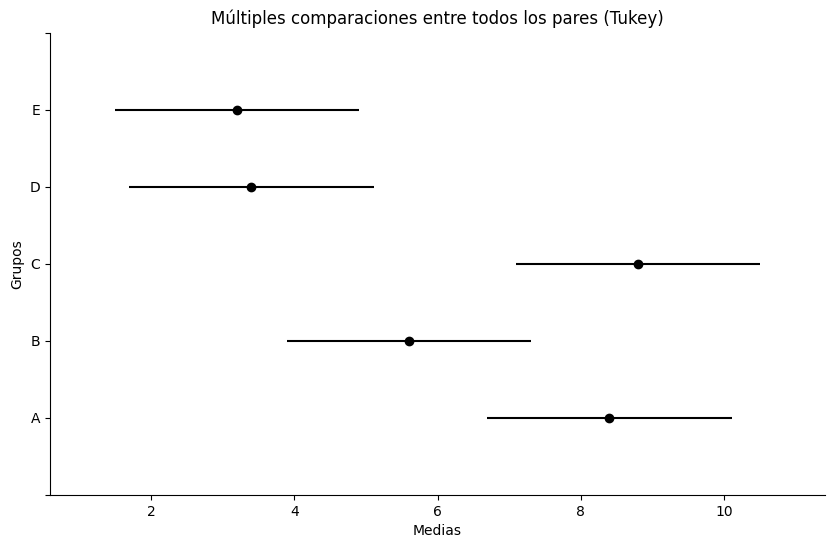

In [137]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Tiempo'], groups=df['Catalizador'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Yessenia Guadalupe Alvarez Morales

# e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días. ¿Cuál tratamiento es mejor?

<ipython-input-138-29f3f63fbe0e>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x="Catalizador", y="Tiempo", estimator=np.mean, ci=None)
<ipython-input-138-29f3f63fbe0e>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x="Lote", y="Tiempo", estimator=np.mean, ci=None)
<ipython-input-138-29f3f63fbe0e>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x="Día", y="Tiempo", estimator=np.mean, ci=None)


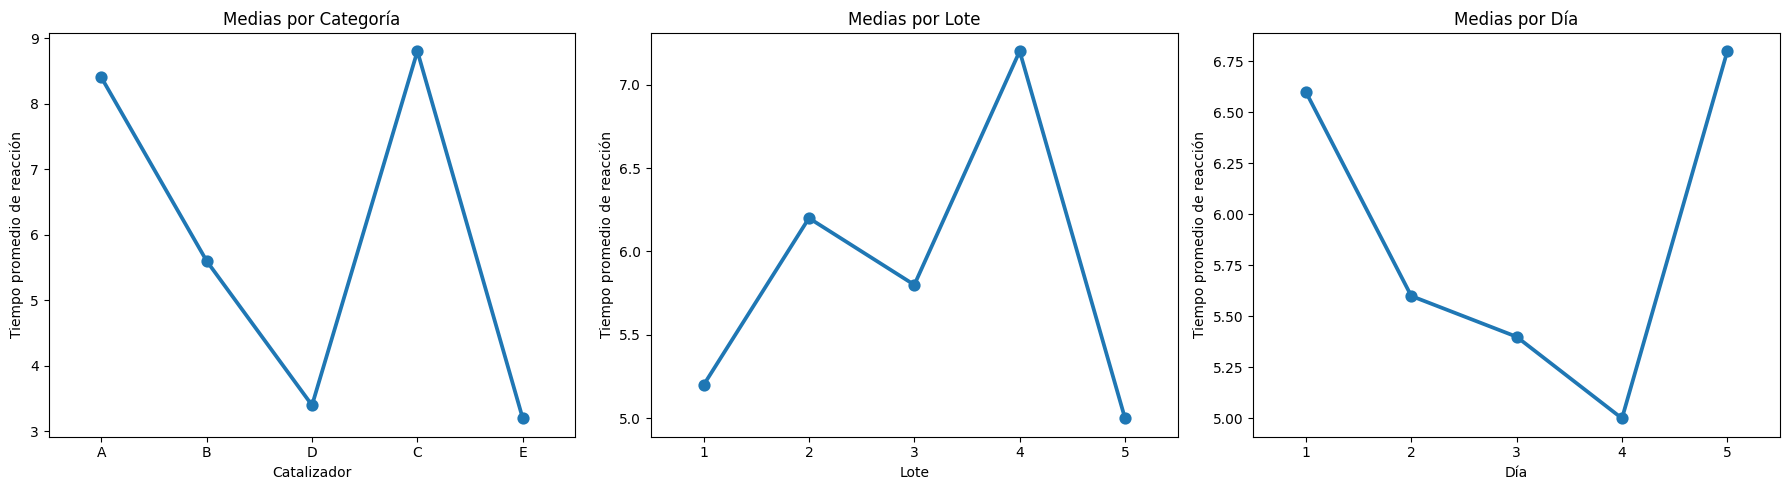

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gráfico de medias por tratamiento (Catalizador)
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.pointplot(data=df, x="Catalizador", y="Tiempo", estimator=np.mean, ci=None)
plt.title("Medias por Categoría")
plt.ylabel("Tiempo promedio de reacción")

# Gráfico de medias por Lote
plt.subplot(1, 3, 2)
sns.pointplot(data=df, x="Lote", y="Tiempo", estimator=np.mean, ci=None)
plt.title("Medias por Lote")
plt.ylabel("Tiempo promedio de reacción")

# Gráfico de medias por Día
plt.subplot(1, 3, 3)
sns.pointplot(data=df, x="Día", y="Tiempo", estimator=np.mean, ci=None)
plt.title("Medias por Día")
plt.ylabel("Tiempo promedio de reacción")

plt.tight_layout()
plt.show()

#Yessenia Guadalupe Alvarez Morales

# f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.

# TEST DE SHAPIRO SUPUESTO DE NORMALIDAD

In [139]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Catalizador'] == 'A']['Tiempo'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['Catalizador'] == 'B']['Tiempo'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['Catalizador'] == 'C']['Tiempo'], "Grupo C", nivel_de_significancia)
prueba_shapiro(df[df['Catalizador'] == 'D']['Tiempo'], "Grupo D", nivel_de_significancia)
prueba_shapiro(df[df['Catalizador'] == 'E']['Tiempo'], "Grupo E", nivel_de_significancia)

#Yessenia Guadalupe Alvarez Morales


Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.9609
Valor p: 0.8140
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9524
Valor p: 0.7540
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.9137
Valor p: 0.4899
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo D:
Estadístico: 0.9524
Valor p: 0.7540
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo E:
Estadístico: 0.9787
Valor p: 0.9276
Interpretación: Los datos tienen una distribución normal.


# TEST DE BARLETT SUPUESTO DE HOMOSCEDASTICIDAD

In [140]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Catalizador'] == 'A']['Tiempo'],
    df[df['Catalizador'] == 'B']['Tiempo'],
    df[df['Catalizador'] == 'C']['Tiempo'],
    df[df['Catalizador'] == 'D']['Tiempo'],
    df[df['Catalizador'] == 'E']['Tiempo'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
#Yessenia Guadalupe Alvarez Morales

Estadístico de Bartlett: 3.964568090461087
Valor p: 0.4108222744947537
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


## Problema 8
En el problema anterior elimine el factor de bloque días, y conteste:

a) ¿Se justifica la eliminación?  
b) Sin tomar en cuenta el día, señale el nombre del diseño, el modelo y las hipótesis más adecuadas al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error, en este caso con el del problema anterior. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y del anterior?


# Diseño en bloques completamente al azar

In [141]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Lote'    # La variable que no me interesa comparar
interes = 'Catalizador'      # La variable que me interesa comparar
respuesta = 'Tiempo'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
# print(tabla_anova) #

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
tabla_anova

#Yessenia Guadalupe Alvarez Morales

Resultados del ANOVA:

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


,sum_sq,df,F,PR(>F)
C(Catalizador),141.44,4.0,11.369775,0.000146
C(Lote),15.44,4.0,1.241158,0.333144
Residual,49.76,16.0,NaN,NaN


## Problema 9
Con respecto a los problemas 7 y 8, además de eliminar el factor día ahora elimine el factor lote, y conteste lo siguiente:

a) ¿Se justifica esta segunda eliminación en ambos problemas?  
b) Después de la doble eliminación, señale el nombre del diseño, el modelo y la(s) hipótesis más adecuada(s) al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error obtenido con los de los problemas 16 y 17. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y de los dos anteriores?  
f) ¿Cree que esta eliminación hubiese afectado si los factores de bloque hubieran sido significativos?  


# ANOVA DE UNA SOLA VIA

In [142]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols('Tiempo~ C(Lote)',data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#No se rechaza la hipotesis nula
#Yessenia Guadalupe Alvarez Morales

,df,sum_sq,mean_sq,F,PR(>F)
C(Lote),4.0,15.44,3.86,0.403766,0.803667
Residual,20.0,191.20,9.56,NaN,NaN


## Problema 10
Se comprueba el peso en gramos de un material de tres proveedores: **A, B y C**, por tres diferentes inspectores: **I, II y III**, utilizando tres diferentes escalas: **1, 2 y 3**. El experimento se lleva a cabo como el siguiente cuadro latino:

| Inspector | Escala 1 | Escala 2 | Escala 3 |
|-----------|----------|----------|----------|
| I         | A = 16   | B = 10   | C = 11   |
| II        | B = 15   | C = 9    | A = 14   |
| III       | C = 13   | A = 11   | B = 13   |

**Preguntas:**<br>
a) ¿Hay diferencias entre los proveedores?  
b) ¿Hay diferencias entre los inspectores y entre las escalas?  
c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?  
d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.  


In [143]:
import pandas as pd
from io import StringIO

data = '''
Inspector,Escala,Proveedor,Peso
I,1,A,16
I,2,B,10
I,3,C,11
II,1,B,15
II,2,C,9
II,3,A,14
III,1,C,13
III,2,A,11
III,3,B,13


'''

df = pd.read_csv(StringIO(data))
df

#Yessenia Guadalupe Alvarez Morales

,Inspector,Escala,Proveedor,Peso
0,I,1,A,16
1,I,2,B,10
2,I,3,C,11
3,II,1,B,15
4,II,2,C,9
5,II,3,A,14
6,III,1,C,13
7,III,2,A,11
8,III,3,B,13


# Diseño en cuadro latino

In [144]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Inspector'   # Primer bloque (factor no principal)
bloque_2 = 'Escala'      # Segundo bloque (factor no principal)
interes = 'Proveedor'       # Variable de interés (tratamiento)
respuesta = 'Peso'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)
# print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")
tabla_anova

#Yessenia Guadalupe Alvarez Morales

Resultados del ANOVA para el Cuadro Latino:
                 sum_sq   df      F    PR(>F)
C(Proveedor)  10.888889  2.0   49.0  0.020000
C(Inspector)   0.222222  2.0    1.0  0.500000
C(Escala)     32.888889  2.0  148.0  0.006711
Residual       0.222222  2.0    NaN       NaN

Conclusión: Hay diferencias significativas: Proveedor.
Conclusión: No hay diferencias significativas: Inspector.
Conclusión: Hay diferencias significativas: Escala.


,sum_sq,df,F,PR(>F)
C(Proveedor),10.888889,2.0,49.0,0.020000
C(Inspector),0.222222,2.0,1.0,0.500000
C(Escala),32.888889,2.0,148.0,0.006711
Residual,0.222222,2.0,NaN,NaN


# d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.

In [145]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Escala'    # La variable que no me interesa comparar
interes = 'Proveedor'      # La variable que me interesa comparar
respuesta = 'Peso'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
# print(tabla_anova) #

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
tabla_anova

#Yessenia Guadalupe Alvarez Morales

Resultados del ANOVA:

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


,sum_sq,df,F,PR(>F)
C(Proveedor),10.888889,2.0,49.0,0.001538
C(Escala),32.888889,2.0,148.0,0.000178
Residual,0.444444,4.0,NaN,NaN


## Problema 11
Cuando se comparan varios fertilizantes o diferentes variedades de cierto cultivo, es típico que se deba considerar el gradiente de fertilidad del suelo (factor columna) o los efectos residuales de cultivos previos (factor renglón). Considerando estos factores de bloque, Gomez y Gomez (1984) plantean un experimento en cuadro latino para comparar, en cuanto a rendimiento en toneladas por hectárea, tres variedades de maíz híbrido (**A, B, C**) y una variedad control (**D**). Para ello, se utiliza un campo agrícola cuadrado de 16 hectáreas, dividido en parcelas de una hectárea. Los datos de rendimiento obtenidos en cada parcela se muestran a continuación:

| Ren\Col | 1       | 2       | 3       | 4       |
|---------|---------|---------|---------|---------|
| 1       | 1.640(B)| 1.210(D)| 1.425(C)| 1.345(A)|
| 2       | 1.475(C)| 1.185(A)| 1.400(D)| 1.290(B)|
| 3       | 1.670(A)| 0.710(C)| 1.665(B)| 1.180(D)|
| 4       | 1.565(D)| 1.290(B)| 1.655(A)| 0.660(C)|

**Preguntas y ejercicios:**<br>
a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?  
b) ¿Cuál de los factores de bloque tuvo efectos?  
c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?  
d) ¿Y con un diseño en bloques completos al azar?  


In [146]:
import pandas as pd
from io import StringIO

data = '''
Ren,Col,Rendimiento,Variedad
1,1,A,1.640
1,2,B,1.210
1,3,D,1.425
1,4,C,1.345
2,1,C,1.475
2,2,A,1.185
2,3,D,1.400
2,4,B,1.290
3,1,A,1.670
3,2,C,0.710
3,3,B,1.665
3,4,D,1.180
4,1,D,1.565
4,2,B,1.290
4,3,A,1.655
4,4,C,0.660



'''

df = pd.read_csv(StringIO(data))
df

#Yessenia Guadalupe Alvarez Morales

,Ren,Col,Rendimiento,Variedad
0,1,1,A,1.640
1,1,2,B,1.210
2,1,3,D,1.425
3,1,4,C,1.345
4,2,1,C,1.475
5,2,2,A,1.185
6,2,3,D,1.400
7,2,4,B,1.290
8,3,1,A,1.670
9,3,2,C,0.710


# Diseño en cuadro latino

In [147]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Ren'   # Primer bloque (factor no principal)
bloque_2 = 'Col'      # Segundo bloque (factor no principal)
interes = 'Rendimiento'       # Variable de interés (tratamiento)
respuesta = 'Variedad'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)
# print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")
tabla_anova

#Yessenia Guadalupe Alvarez Morales

Resultados del ANOVA para el Cuadro Latino:
                  sum_sq   df         F    PR(>F)
C(Rendimiento)  0.303841  3.0  2.405843  0.165824
C(Ren)          0.030155  3.0  0.238768  0.866379
C(Col)          0.620003  3.0  4.909251  0.046917
Residual        0.252586  6.0       NaN       NaN

Conclusión: No hay diferencias significativas: Rendimiento.
Conclusión: No hay diferencias significativas: Ren.
Conclusión: Hay diferencias significativas: Col.


,sum_sq,df,F,PR(>F)
C(Rendimiento),0.303841,3.0,2.405843,0.165824
C(Ren),0.030155,3.0,0.238768,0.866379
C(Col),0.620003,3.0,4.909251,0.046917
Residual,0.252586,6.0,NaN,NaN


## Problema 12
Se quieren comparar tres dietas (**A, B, C**) a base de proteínas de origen vegetal utilizando 18 ratas de laboratorio de una misma camada. Primero se observa por un tiempo el apetito para formar tres grupos de seis ratas, según su voracidad; y cada uno de estos grupos se clasifica a su vez en tres grupos de dos ratas, de acuerdo a su peso inicial. Se plantea un experimento donde la variable de respuesta es el peso en gramos ganado por las ratas después de cierto periodo, con los siguientes resultados:

| Apetito/peso inicial | A1        | A2        | A3        |
|-----------------------|-----------|-----------|-----------|
| P1                   | 67 (C)    | 105 (A)   | 95 (B)    |
|                       | 72        | 112       | 86        |
| P2                   | 85 (A)    | 75 (B)    | 88 (C)    |
|                       | 98        | 67        | 110       |
| P3                   | 66 (B)    | 68 (C)    | 108 (A)   |
|                       | 47        | 91        | 120       |

### Preguntas:
a) Analice los datos. ¿Cuáles de los factores influyen en el peso ganado por las ratas?  
b) ¿Cuál dieta es mejor?  
c) ¿Alguno de los factores de bloque puede ser ignorado? Argumente su respuesta.  
d) Si ese fuera el caso, analice de nuevo el experimento y saque conclusiones.  
e) Verifique los supuestos del modelo.  


In [159]:
import pandas as pd
from io import StringIO

data = '''
Apetito,Peso_inicial,Rendimiento,Dieta
A1,67,72,C
A2,105,112,A
A3,95,86,B
A1,85,98,A
A2,75,67,B
A3,88,110,C
A1,66,47,B
A2,68,91,C
A3,108,120,A



'''

df = pd.read_csv(StringIO(data))
df

#Yessenia Guadalupe Alvarez Morales

,Apetito,Peso_inicial,Rendimiento,Dieta
0,A1,67,72,C
1,A2,105,112,A
2,A3,95,86,B
3,A1,85,98,A
4,A2,75,67,B
5,A3,88,110,C
6,A1,66,47,B
7,A2,68,91,C
8,A3,108,120,A


# Diseño en bloques completamente al azar

In [149]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Apetito'    # La variable que no me interesa comparar #categorica
interes = 'Dieta'      # La variable que me interesa comparar #categorica
respuesta = 'Rendimiento'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
# print(tabla_anova) #

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
tabla_anova

#Yessenia Guadalupe Alvarez Morales

Resultados del ANOVA:

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


,sum_sq,df,F,PR(>F)
C(Dieta),2830.888889,2.0,59.948235,0.001042
C(Apetito),1636.222222,2.0,34.649412,0.002978
Residual,94.444444,4.0,NaN,NaN


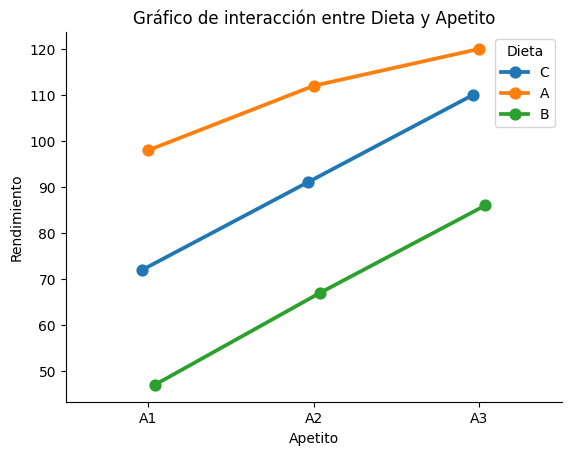

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

#Yessenia Guadalupe Alvarez Morales

# e) Verifique los supuestos del modelo.

# TEST DE SHAPIRO SUPUESTO DE NORMALIDAD

In [160]:

# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Dieta'] == 'A']['Rendimiento'], 'Dieta A', nivel_de_significancia)
prueba_shapiro(df[df['Dieta'] == 'B']['Rendimiento'], 'Dieta B', nivel_de_significancia)
prueba_shapiro(df[df['Dieta'] == 'C']['Rendimiento'], 'Dieta C', nivel_de_significancia)


#Yessenia Guadalupe Alvarez Morales



Prueba de Shapiro-Wilk para Dieta A:
Estadístico: 0.9758
Valor p: 0.7017
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Dieta B:
Estadístico: 0.9998
Valor p: 0.9717
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Dieta C:
Estadístico: 1.0000
Valor p: 1.0000
Interpretación: Los datos tienen una distribución normal.


# TEST DE BARLETT SUPUESTO DE HOMOSCEDASTICIDAD

In [162]:

from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Dieta'] == 'A']['Rendimiento'],
    df[df['Dieta'] == 'B']['Rendimiento'],
    df[df['Dieta'] == 'C']['Rendimiento']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

#Yessenia Guadalupe Alvarez Morales

Estadístico de Bartlett: 3.069980546999267
Valor p: 0.21545778680979277
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


## Problema 13
Una compañía distribuidora ubicada en los suburbios está interesada en estudiar la diferencia en costos (tiempo y gasolina) entre las cuatro rutas (**A, B, C, D**) que llevan a la zona comercial, más importante para ellos, en el otro extremo de la ciudad. Deciden correr un experimento en cuadro grecolatino controlando los factores de bloque **chofer**, marca de vehículo (**α, β, χ, δ**) y día de la semana. El experimento se repite en dos semanas diferentes, en las cuales no hay días festivos ni quincenas. Los costos observados en pesos se muestran en la siguiente tabla:

| Chofer/día | Lunes       | Martes      | Miércoles   | Jueves      |
|------------|-------------|-------------|-------------|-------------|
| Carlos     | 825(D, α)   | 585(C, χ)   | 550(B, β)   | 580(A, δ)   |
|            | 750         | 610         | 580         | 650         |
| Enrique    | 650(A, χ)   | 540(B, α)   | 580(C, χ)   | 850(D, β)   |
|            | 725         | 560         | 635         | 770         |
| Genaro     | 700(C, β)   | 650(D, δ)   | 635(A, α)   | 450(B, χ)   |
|            | 675         | 740         | 540         | 550         |
| Luis       | 475(B, δ)   | 560(A, β)   | 650(D, α)   | 670(C, α)   |
|            | 480         | 615         | 725         | 730         |

### Preguntas:
a) Haga el análisis de varianza de este experimento.  
b) Realice las pruebas de comparaciones múltiples para los factores significativos.  
c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.  
d) ¿Cuál es la mejor ruta? ¿Cuál es la peor?  
e) ¿Hay diferencias significativas entre los choferes? ¿Y entre el tipo o marca de unidad?  
f) ¿Cuáles factores de bloque valió la pena tomar en cuenta en el experimento?  
g) ¿Por qué se evitaron días festivos y quincenas en el experimento? ¿Cuáles otros aspectos se tenían que tomar en cuenta?  
h) Verifique los supuestos del modelo.  


In [164]:
import pandas as pd
from io import StringIO

data = '''
Chofer,Día,Ruta,Marca,Costo,Tiempo
Carlos,Lunes,(D, α),825,750
Carlos,Martes,(C, χ),585,610
Carlos,Miércoles,(B, β),550,580
Carlos,Jueves,(A, δ),580,650
Enrique,Lunes,(A, χ),650,725
Enrique,Martes,(B, α),540,560
Enrique,Miércoles,(C, χ),580,635
Enrique,Jueves,(D, β),850,770
Genaro,Lunes,(C, β),700,675
Genaro,Martes,(D, δ),650,740
Genaro,Miércoles,(A, α),635,540
Genaro,Jueves,(B, χ),450,550
Luis,Lunes,(B, δ),475,480
Luis,Martes,(A, β),560,615
Luis,Miércoles,(D, α),650,725
Luis,Jueves,(C, α),670,730



'''

df = pd.read_csv(StringIO(data))
df

#Yessenia Guadalupe Alvarez Morales

,Chofer,Día,Ruta,Marca,Costo,Tiempo
0,Carlos,Lunes,(D,α),825,750
1,Carlos,Martes,(C,χ),585,610
2,Carlos,Miércoles,(B,β),550,580
3,Carlos,Jueves,(A,δ),580,650
4,Enrique,Lunes,(A,χ),650,725
5,Enrique,Martes,(B,α),540,560
6,Enrique,Miércoles,(C,χ),580,635
7,Enrique,Jueves,(D,β),850,770
8,Genaro,Lunes,(C,β),700,675
9,Genaro,Martes,(D,δ),650,740


In [152]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Chofer'   # Primer bloque (factor no principal)
bloque_2 = 'Marca'      # Segundo bloque (factor no principal)
bloque_3 = 'Día'      # Tercer bloque (factor no principal)
interes = 'Ruta'       # Variable de interés (tratamiento)
respuesta = 'Tiempo'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2}) + C({bloque_3})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
# print(tabla_anova) print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

if tabla_anova["PR(>F)"][f"C({bloque_3})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_3}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_3}.")
tabla_anova

#Yessenia Guadalupe Alvarez Morales

Resultados del ANOVA para el Cuadro Latino:

Conclusión: No hay diferencias significativas: Ruta.
Conclusión: No hay diferencias significativas: Chofer.
Conclusión: No hay diferencias significativas: Marca.
Conclusión: No hay diferencias significativas: Día.


,sum_sq,df,F,PR(>F)
C(Ruta),78695.299343,3.0,4.212933,0.134122
C(Chofer),3269.573897,3.0,0.175036,0.906882
C(Marca),1879.916159,3.0,0.100641,0.954370
C(Día),8231.659818,3.0,0.440680,0.740800
Residual,18679.458841,3.0,NaN,NaN


# b) Realice las pruebas de comparaciones múltiples para los factores significativos.

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
    (A     (B    -90.0 0.1221 -199.5778  19.5778  False
    (A     (C     30.0 0.8473  -79.5778 139.5778  False
    (A     (D   113.75 0.0411    4.1722 223.3278   True
    (B     (C    120.0 0.0306   10.4222 229.5778   True
    (B     (D   203.75 0.0007   94.1722 313.3278   True
    (C     (D    83.75 0.1602  -25.8278 193.3278  False
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

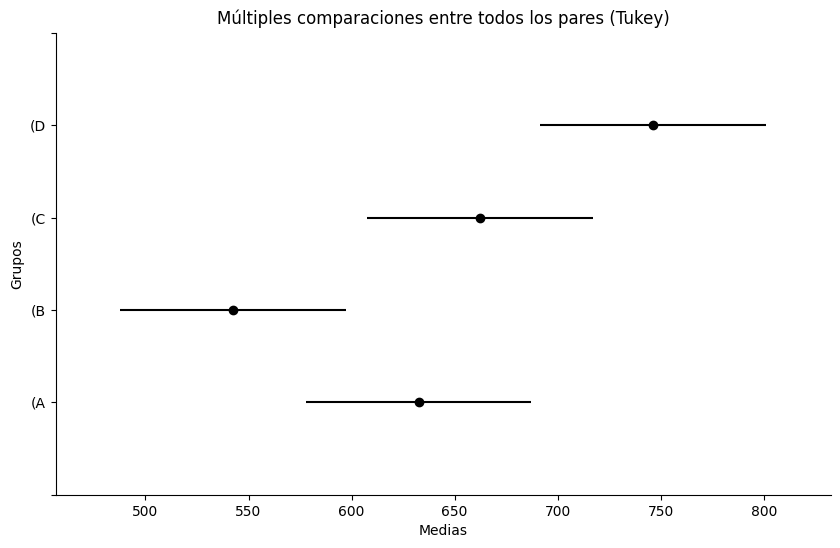

In [165]:

from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Tiempo'], groups=df['Ruta'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Yessenia Guadalupe Alvarez Morales

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1   group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
Jueves     Lunes    -17.5 0.9936 -218.5812 183.5812  False
Jueves    Martes   -43.75 0.9149 -244.8312 157.3312  False
Jueves Miércoles    -55.0 0.8476 -256.0812 146.0812  False
 Lunes    Martes   -26.25 0.9793 -227.3312 174.8312  False
 Lunes Miércoles    -37.5 0.9438 -238.5812 163.5812  False
Martes Miércoles   -11.25 0.9983 -212.3312 189.8312  False
----------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

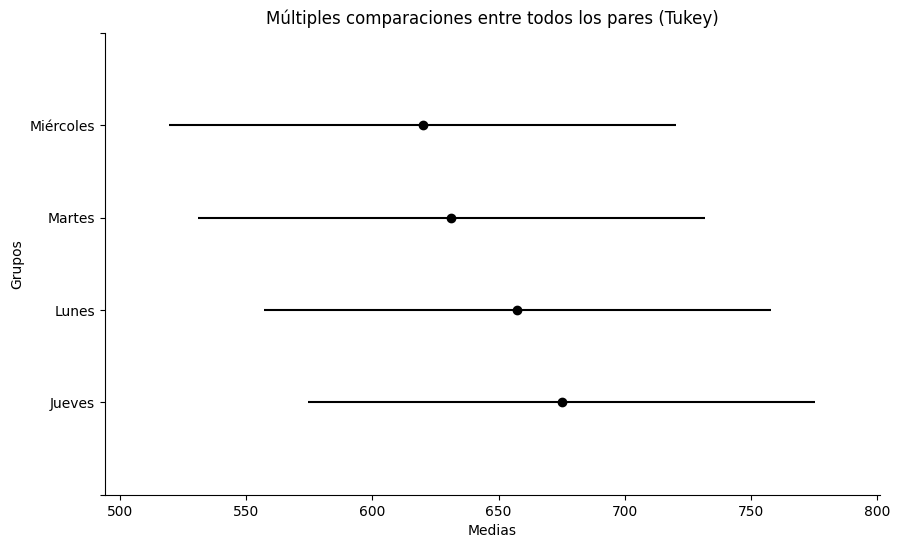

In [166]:

from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Tiempo'], groups=df['Día'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Yessenia Guadalupe Alvarez Morales

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
    α)     β)     -1.0    1.0 -194.3379 192.3379  False
    α)     δ) -37.6667 0.9498 -248.1463  172.813  False
    α)     χ)    -31.0  0.963 -224.3379 162.3379  False
    β)     δ) -36.6667 0.9588 -256.7916 183.4583  False
    β)     χ)    -30.0 0.9709 -233.7961 173.7961  False
    δ)     χ)   6.6667 0.9997 -213.4583 226.7916  False
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

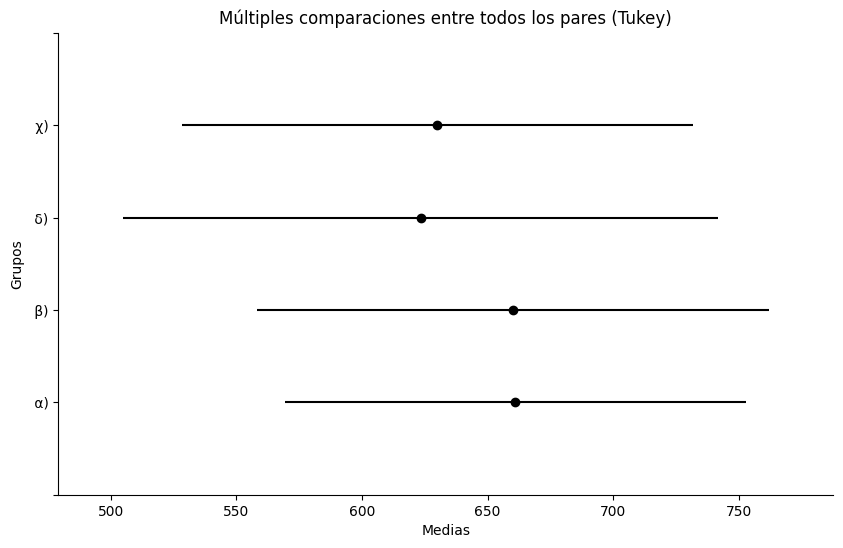

In [167]:

from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Tiempo'], groups=df['Marca'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Yessenia Guadalupe Alvarez Morales

# c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.

<ipython-input-168-749990c78240>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Ruta', y='Tiempo', data=df, ci=95)


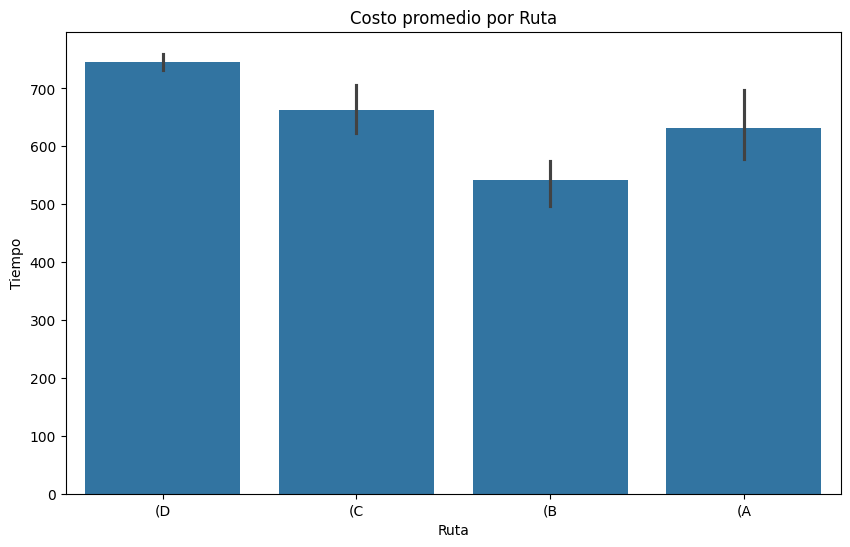

In [168]:
# Gráficos de medias por factor
plt.figure(figsize=(10,6))
sns.barplot(x='Ruta', y='Tiempo', data=df, ci=95)
plt.title('Costo promedio por Ruta')
plt.show()
#Yessenia Guadalupe Alvarez Morales

<ipython-input-169-5526a6729579>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Día', y='Tiempo', data=df, ci=95)


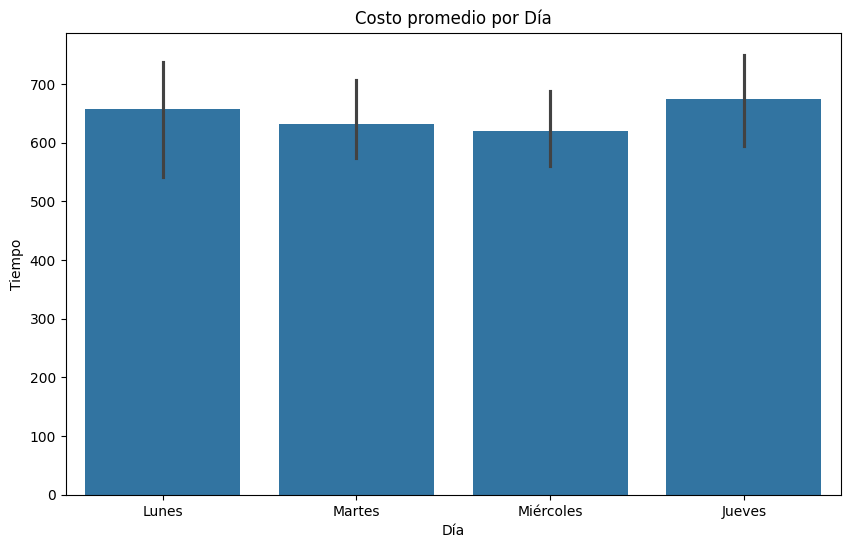

In [169]:
plt.figure(figsize=(10,6))
sns.barplot(x='Día', y='Tiempo', data=df, ci=95)
plt.title('Costo promedio por Día')
plt.show()
#Yessenia Guadalupe Alvarez Morales

<ipython-input-170-379d2acd3fd6>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Marca', y='Tiempo', data=df, ci=95)


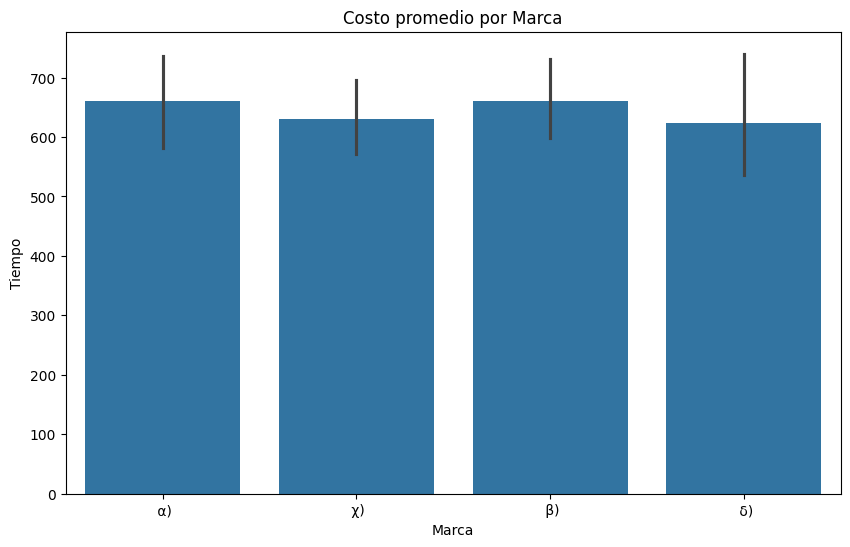

In [170]:
plt.figure(figsize=(10,6))
sns.barplot(x='Marca', y='Tiempo', data=df, ci=95)
plt.title('Costo promedio por Marca')
plt.show()
#Yessenia Guadalupe Alvarez Morales

# DIAGRAMA DE DISPERCION

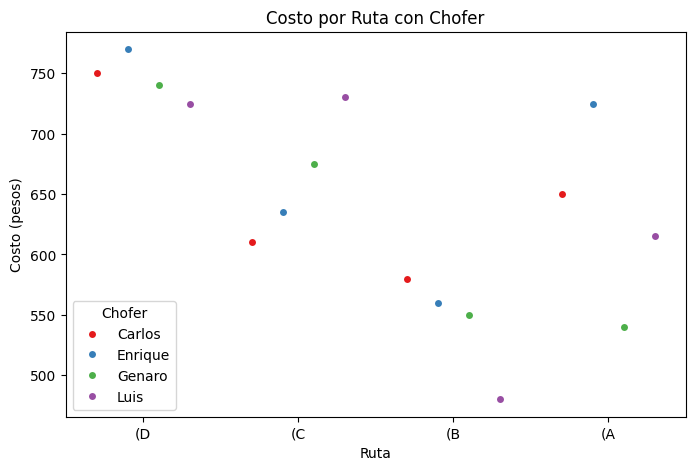

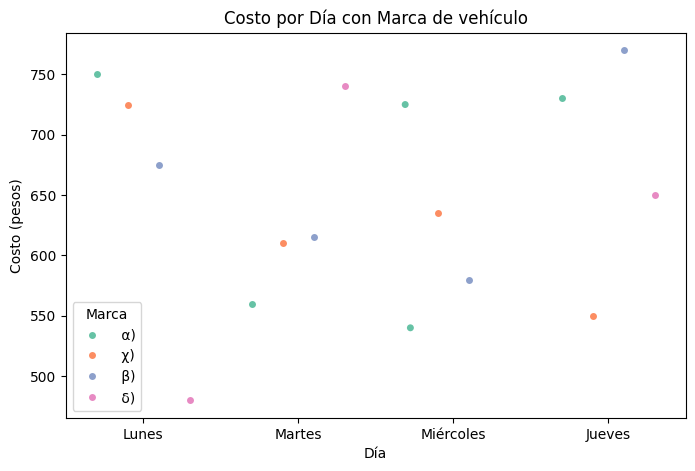

In [172]:
# Diagrama de dispersión costo vs ruta, coloreado por chofer
plt.figure(figsize=(8,5))
sns.stripplot(x='Ruta', y='Tiempo', hue='Chofer', data=df, dodge=True, jitter=True, palette='Set1')
plt.title('Costo por Ruta con Chofer')
plt.ylabel('Costo (pesos)')
plt.show()

# Diagrama de dispersión costo vs día, coloreado por marca
plt.figure(figsize=(8,5))
sns.stripplot(x='Día', y='Tiempo', hue='Marca', data=df, dodge=True, jitter=True, palette='Set2')
plt.title('Costo por Día con Marca de vehículo')
plt.ylabel('Costo (pesos)')
plt.show()
#Yessenia Guadalupe Alvarez Morales

# h) Verifique los supuestos del modelo.

# TEST DE SHAPIRO SUPUESTO DE NORMALIDAD

In [173]:

# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Ruta'] == 'A']['Tiempo'], "Ruta A", nivel_de_significancia)
prueba_shapiro(df[df['Ruta'] == 'B']['Tiempo'], "Ruta B", nivel_de_significancia)
prueba_shapiro(df[df['Ruta'] == 'C']['Tiempo'], "Ruta C", nivel_de_significancia)
prueba_shapiro(df[df['Ruta'] == 'D']['Tiempo'], "Ruta D", nivel_de_significancia)

#Yessenia Guadalupe Alvarez Morales


Prueba de Shapiro-Wilk para Ruta A:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Ruta B:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Ruta C:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Ruta D:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.


<ipython-input-173-b0f603f02fc1>:9: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = shapiro(datos)


# TEST DE BARLETT SUPUESTO DE HOMOSCEDASTICIDAD

In [174]:

from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Ruta'] == 'A']['Tiempo'],
    df[df['Ruta'] == 'B']['Tiempo'],
    df[df['Ruta'] == 'C']['Tiempo'],
    df[df['Ruta'] == 'D']['Tiempo']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
#Yessenia Guadalupe Alvarez Morales

Estadístico de Bartlett: nan
Valor p: nan
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


<ipython-input-174-cb2079f98cca>:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = bartlett(


## Problema 14
23. Un investigador está interesado en el efecto del porcentaje de lisina y del porcentaje de proteína en la producción de vacas lecheras. Se consideran siete niveles en cada factor:

- **% de lisina**: 0.0 (**A**), 0.1 (**B**), 0.2 (**C**), 0.3 (**D**), 0.4 (**E**), 0.5 (**F**), 0.6 (**G**).  
- **% de proteína**: 2 (**α**), 4 (**β**), 6 (**χ**), 8 (**δ**), 10 (**ε**), 12 (**φ**), 14 (**γ**).  

Para el estudio, se seleccionaron siete vacas al azar, a las cuales se les da un seguimiento de siete periodos de tres meses. Los datos en galones de leche fueron los siguientes:

| Vaca/periodo | 1       | 2       | 3       | 4       | 5       | 6       | 7       |
|--------------|---------|---------|---------|---------|---------|---------|---------|
| 1            | 304 (Aα)| 436 (Bε)| 350 (Cβ)| 504 (Dφ)| 417 (Eχ)| 519 (Fγ)| 432 (Gδ)|
| 2            | 381 (Bβ)| 505 (Cφ)| 425 (Dχ)| 564 (Eγ)| 487 (Fα)| 536 (Gε)| 483 (Aχ)|
| 3            | 432 (Cχ)| 566 (Dγ)| 479 (Eε)| 357 (Fα)| 466 (Gβ)| 465 (Aφ)| 507 (Bγ)|
| 4            | 442 (Dδ)| 372 (Eχ)| 536 (Fε)| 366 (Gβ)| 495 (Aχ)| 425 (Bφ)| 507 (Cγ)|
| 5            | 496 (Eε)| 449 (Fβ)| 493 (Gφ)| 345 (Aχ)| 509 (Bγ)| 481 (Cδ)| 380 (Dα)|
| 6            | 534 (Fφ)| 421 (Gχ)| 352 (Aγ)| 427 (Bδ)| 346 (Cχ)| 478 (Dε)| 397 (Eβ)|
| 7            | 543 (Gγ)| 386 (Aδ)| 435 (Bα)| 485 (Cε)| 406 (Dφ)| 554 (Eφ)| 410 (Fχ)|

### Preguntas y ejercicios:
a) Analice este experimento. ¿Qué factores tienen efecto en la producción de leche?  
b) Interprete los resultados usando gráficos de medias.  
c) ¿Cómo puede explicar la falta de efectos en vacas y periodo?  
d) ¿Qué porcentajes de lisina y proteína dan los mejores resultados?  
e) Verifique los supuestos del modelo.  


In [177]:
import pandas as pd
from io import StringIO

data = '''
Vaca,Periodo,Lisina,Proteina,Leche
1,1, (A,α),304
1,2, (B,ε),436
1,3, (C,β),350
1,4, (D,φ),504
1,5, (E,χ),417
1,6, (F,γ),519
1,7, (G,δ),432
2,1, (B,β),381
2,2, (C,φ),505
2,3, (D,χ),425
2,4, (E,γ),564
2,5, (F,α),487
2,6, (G,ε),536
2,7, (A,χ),483
3,1, (C,χ),432
3,2, (D,γ),566
3,3, (E,ε),479
3,4, (F,α),357
3,5, (G,β),466
3,6, (A,φ),465
3,7, (B,γ),507
4,1, (D,δ),442
4,2, (E,χ),372
4,3, (F,ε),536
4,4, (G,β),366
4,5, (A,χ),495
4,6, (B,φ),425
4,7, (C,γ),507
5,1, (E,ε),496
5,2, (F,β),449
5,3, (G,φ),493
5,4, (A,χ),345
5,5, (B,γ),509
5,6, (C,δ),481
5,7, (D,α),380
6,1, (F,φ),534
6,2, (G,χ),421
6,3, (A,γ),352
6,4, (B,δ),427
6,5, (C,χ),346
6,6, (D,ε),478
6,7, (E,β),397
7,1, (G,γ),543
7,2, (A,δ),386
7,3, (B,α),435
7,4, (C,ε),485
7,5, (D,φ),406
7,6, (E,φ),554
7,7, (F,χ),410





'''

df = pd.read_csv(StringIO(data))
df
#Yessenia Guadalupe Alvarez Morales

,Vaca,Periodo,Lisina,Proteina,Leche
0,1,1,(A,α),304
1,1,2,(B,ε),436
2,1,3,(C,β),350
3,1,4,(D,φ),504
4,1,5,(E,χ),417
5,1,6,(F,γ),519
6,1,7,(G,δ),432
7,2,1,(B,β),381
8,2,2,(C,φ),505
9,2,3,(D,χ),425


# PROTEINA

In [154]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Vaca'   # Primer bloque (factor no principal)
bloque_2 = 'Periodo'      # Segundo bloque (factor no principal)
bloque_3 = 'Lisina'      # Tercer bloque (factor no principal)
interes = 'Proteina'       # Variable de interés (tratamiento)
respuesta = 'Leche'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2}) + C({bloque_3})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
# print(tabla_anova) print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

if tabla_anova["PR(>F)"][f"C({bloque_3})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_3}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_3}.")
tabla_anova

#Yessenia Guadalupe Alvarez Morales

Resultados del ANOVA para el Cuadro Latino:

Conclusión: Hay diferencias significativas: Proteina.
Conclusión: No hay diferencias significativas: Vaca.
Conclusión: No hay diferencias significativas: Periodo.
Conclusión: No hay diferencias significativas: Lisina.


,sum_sq,df,F,PR(>F)
C(Proteina),81658.082957,6.0,4.694560,0.002717
C(Vaca),22265.466411,6.0,1.280052,0.303492
C(Periodo),4518.955264,6.0,0.259797,0.950234
C(Lisina),19815.528269,6.0,1.139204,0.370349
Residual,69576.774186,24.0,NaN,NaN


# LISINA

In [155]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Vaca'   # Primer bloque (factor no principal)
bloque_2 = 'Periodo'      # Segundo bloque (factor no principal)
bloque_3 = 'Proteina'      # Tercer bloque (factor no principal)
interes = 'Lisina'       # Variable de interés (tratamiento)
respuesta = 'Leche'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2}) + C({bloque_3})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
# print(tabla_anova) print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

if tabla_anova["PR(>F)"][f"C({bloque_3})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_3}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_3}.")
tabla_anova

#Yessenia Guadalupe Alvarez Morales

Resultados del ANOVA para el Cuadro Latino:

Conclusión: No hay diferencias significativas: Lisina.
Conclusión: No hay diferencias significativas: Vaca.
Conclusión: No hay diferencias significativas: Periodo.
Conclusión: Hay diferencias significativas: Proteina.


,sum_sq,df,F,PR(>F)
C(Lisina),19815.528269,6.0,1.139204,0.370349
C(Vaca),22265.466411,6.0,1.280052,0.303492
C(Periodo),4518.955264,6.0,0.259797,0.950234
C(Proteina),81658.082957,6.0,4.694560,0.002717
Residual,69576.774186,24.0,NaN,NaN


# b) Interprete los resultados usando gráficos de medias.

<ipython-input-178-5192962cc0c2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Proteina', y='Leche', estimator=np.mean, errorbar='sd', palette='viridis')


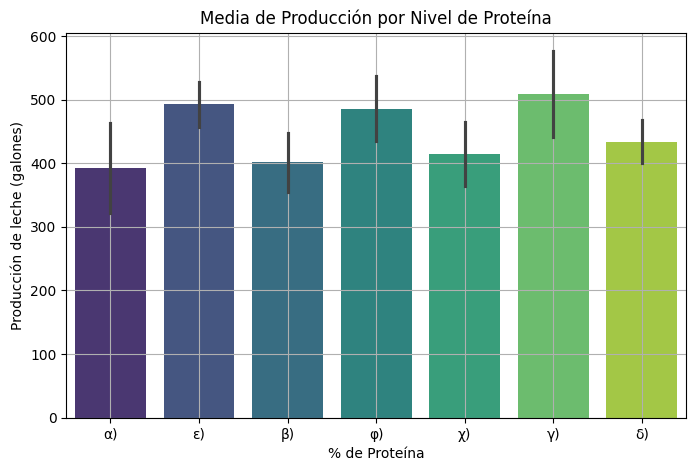

In [178]:


# Gráfico de medias por nivel de proteína
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Proteina', y='Leche', estimator=np.mean, errorbar='sd', palette='viridis')
plt.title('Media de Producción por Nivel de Proteína')
plt.ylabel('Producción de leche (galones)')
plt.xlabel('% de Proteína')
plt.grid(True)
plt.show()

#Yessenia Guadalupe Alvarez Morales


<ipython-input-179-7c667ed77253>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Lisina', y='Leche', estimator=np.mean, errorbar='sd', palette='coolwarm')


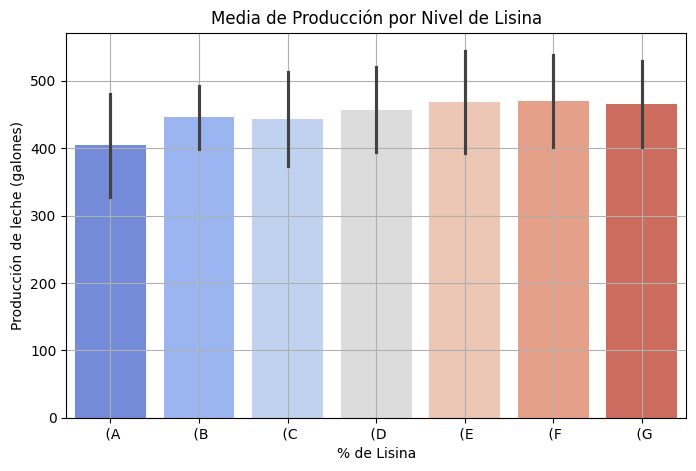

In [179]:
# Gráfico de medias por nivel de lisina
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Lisina', y='Leche', estimator=np.mean, errorbar='sd', palette='coolwarm')
plt.title('Media de Producción por Nivel de Lisina')
plt.ylabel('Producción de leche (galones)')
plt.xlabel('% de Lisina')
plt.grid(True)
plt.show()
#Yessenia Guadalupe Alvarez Morales

In [181]:
# Promedios de producción por combinación
tabla_medias = df.pivot_table(values='Leche', index='Lisina', columns='Proteina', aggfunc='mean')
print(tabla_medias)

Proteina     α)     β)     γ)     δ)     ε)     φ)     χ)
Lisina                                                   
(A        304.0    NaN  352.0  386.0    NaN  465.0  441.0
(B        435.0  381.0  508.0  427.0  436.0  425.0    NaN
(C          NaN  350.0  507.0  481.0  485.0  505.0  389.0
(D        380.0    NaN  566.0  442.0  478.0  455.0  425.0
(E          NaN  397.0  564.0    NaN  487.5  554.0  394.5
(F        422.0  449.0  519.0    NaN  536.0  534.0  410.0
(G          NaN  416.0  543.0  432.0  536.0  493.0  421.0


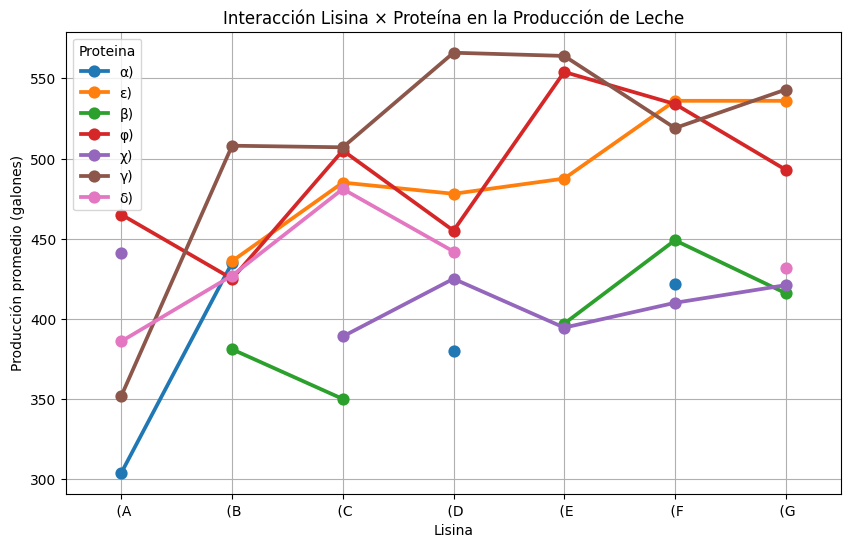

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.pointplot(data=df, x='Lisina', y='Leche', hue='Proteina', palette='tab10', errorbar=None)
plt.title('Interacción Lisina × Proteína en la Producción de Leche')
plt.ylabel('Producción promedio (galones)')
plt.grid(True)
plt.show()
#Yessenia Guadalupe Alvarez Morales

In [183]:
df['Tratamiento'] = df['Lisina'] + df['Proteina']

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
  (Aα)   (Aγ)     48.0    1.0  -432.164  528.164  False
  (Aα)   (Aδ)     82.0    1.0  -398.164  562.164  False
  (Aα)   (Aφ)    161.0 0.9851  -319.164  641.164  False
  (Aα)   (Aχ)    137.0 0.9775 -255.0522 529.0522  False
  (Aα)   (Bα)    131.0 0.9988  -349.164  611.164  False
  (Aα)   (Bβ)     77.0    1.0  -403.164  557.164  False
  (Aα)   (Bγ)    204.0 0.7567 -211.8342 619.8342  False
  (Aα)   (Bδ)    123.0 0.9995  -357.164  603.164  False
  (Aα)   (Bε)    132.0 0.9986  -348.164  612.164  False
  (Aα)   (Bφ)    121.0 0.9996  -359.164  601.164  False
  (Aα)   (Cβ)     46.0    1.0  -434.164  526.164  False
  (Aα)   (Cγ)    203.0 0.8954  -277.164  683.164  False
  (Aα)   (Cδ)    177.0 0.9634  -303.164  657.164  False
  (Aα)   (Cε)    181.0 0.9557  -299.164  661.164  False
  (Aα)   (Cφ)    201.0 0.9022  -279.164  681.164

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

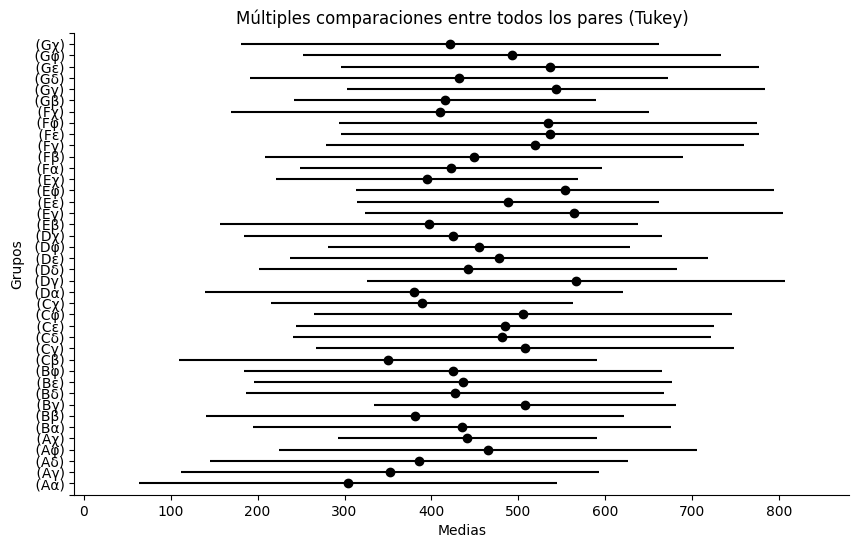

In [185]:
#Yessenia Guadalupe Alvarez Morales
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Leche'], groups=df['Tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

# e) Verifique los supuestos del modelo.

In [186]:

# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Proteina'] == 2]['Leche'], "Proteina 2", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 4]['Leche'], "Proteina 4", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 6]['Leche'], "Proteina 6", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 8]['Leche'], "Proteina 8", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 10]['Leche'], "Proteina 10", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 12]['Leche'], "Proteina 12", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 14]['Leche'], "Proteina 14", nivel_de_significancia)

#Yessenia Guadalupe Alvarez Morales


Prueba de Shapiro-Wilk para Proteina 2:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Proteina 4:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Proteina 6:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Proteina 8:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Proteina 10:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Proteina 12:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Proteina 14:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.


<ipython-input-186-25f66a9682d3>:9: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = shapiro(datos)


In [187]:
#Yessenia Guadalupe Alvarez Morales
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Lisina'] == 0.0]['Leche'], "Lisina 0.0", nivel_de_significancia)
prueba_shapiro(df[df['Lisina'] == 0.1]['Leche'], "Lisina 0.1", nivel_de_significancia)
prueba_shapiro(df[df['Lisina'] == 0.2]['Leche'], "Lisina 0.2", nivel_de_significancia)
prueba_shapiro(df[df['Lisina'] == 0.3]['Leche'], "Lisina 0.3", nivel_de_significancia)
prueba_shapiro(df[df['Lisina'] == 0.4]['Leche'], "Lisina 0.4", nivel_de_significancia)
prueba_shapiro(df[df['Lisina'] == 0.5]['Leche'], "Lisina 0.5", nivel_de_significancia)
prueba_shapiro(df[df['Lisina'] == 0.6]['Leche'], "Lisina 0.6", nivel_de_significancia)


Prueba de Shapiro-Wilk para Lisina 0.0:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Lisina 0.1:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Lisina 0.2:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Lisina 0.3:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Lisina 0.4:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Lisina 0.5:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Lisina 0.6:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.


<ipython-input-187-b8706991e455>:9: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = shapiro(datos)


# TEST DE BARLETT SUPUESTO DE HOMOSCEDASTICIDAD

In [188]:

from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Proteina'] == 2]['Leche'],
    df[df['Proteina'] == 4]['Leche'],
    df[df['Proteina'] == 6]['Leche'],
    df[df['Proteina'] == 8]['Leche'],
    df[df['Proteina'] == 10]['Leche'],
    df[df['Proteina'] == 12]['Leche'],
    df[df['Proteina'] == 14]['Leche']
)

#Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
#Yessenia Guadalupe Alvarez Morales

Estadístico de Bartlett: nan
Valor p: nan
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


<ipython-input-188-3fe54d850118>:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = bartlett(


In [189]:

from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Lisina'] == 0.0]['Leche'],
    df[df['Lisina'] == 0.1]['Leche'],
    df[df['Lisina'] == 0.2]['Leche'],
    df[df['Lisina'] == 0.3]['Leche'],
    df[df['Lisina'] == 0.4]['Leche'],
    df[df['Lisina'] == 0.5]['Leche'],
    df[df['Lisina'] == 0.6]['Leche']
)

#Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
#Yessenia Guadalupe Alvarez Morales

Estadístico de Bartlett: nan
Valor p: nan
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


<ipython-input-189-f0ad46511f8e>:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = bartlett(
